In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('data/combined_subsets.csv')

In [2]:
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.7.0


In [3]:
from collections import Counter

In [28]:
# drop nulls from df
stroke_data_df = data.dropna()

# set y as the 'stroke' output, with targets of 0 (No) and 1 (Yes)
y = stroke_data_df['stroke']
target_names = ['0', '1']

# set X as the df after dropping stroke output and id
X = stroke_data_df.drop('stroke', axis=1).drop('id',axis=1)

# define a smote instance with default parameters
oversample = SMOTE()

# rebalance data by applying SMOTE to add instances of 'Yes'
X, y = oversample.fit_resample(X, y)

# show new counts of output variables by type (should be same)
counter = Counter(y)
print(counter)

Counter({1: 28524, 0: 28524})


In [29]:
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)

In [30]:
stroke_data_df = data.dropna()
stroke_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,0,1,105.92,32.5,0,1
2,60182,0,49.0,0,0,1,0,0,171.23,34.4,2,1
3,1665,0,79.0,1,0,1,1,1,174.12,24.0,0,1
4,56669,1,81.0,0,0,1,0,0,186.21,29.0,1,1


In [31]:
# Create separate df for records that have stroke and have no stroke
stroke_positive = stroke_data_df[stroke_data_df['stroke'] == 1]
stroke_negative = stroke_data_df[stroke_data_df['stroke'] == 0]

# return random sample of 500 for both postive and negative results
stroke_negative_sample = stroke_negative.sample(500)
stroke_positive_sample = stroke_positive.sample(500)

# merge postive and negative df to make one combined df
stroke_sample = pd.merge(stroke_negative_sample, stroke_positive_sample, how = 'outer')

stroke_sample.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,56782,0,19.0,0,0,0,0,1,142.93,29.0,0,0
1,3612,1,67.0,0,0,1,0,1,86.96,31.4,1,0
2,39496,0,14.0,0,0,0,0,0,60.46,35.8,0,0
3,33006,1,53.0,0,0,1,3,1,68.02,28.4,0,0
4,27120,0,23.0,0,0,0,3,1,88.38,36.7,0,0


# K Nearest Neighbor (KNN)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.948
k: 3, Train/Test Score: 0.956/0.928
k: 5, Train/Test Score: 0.935/0.917
k: 7, Train/Test Score: 0.922/0.908
k: 9, Train/Test Score: 0.914/0.900
k: 11, Train/Test Score: 0.905/0.894
k: 13, Train/Test Score: 0.900/0.890
k: 15, Train/Test Score: 0.894/0.888
k: 17, Train/Test Score: 0.889/0.882
k: 19, Train/Test Score: 0.885/0.879
k: 21, Train/Test Score: 0.881/0.875
k: 23, Train/Test Score: 0.878/0.873
k: 25, Train/Test Score: 0.875/0.870
k: 27, Train/Test Score: 0.872/0.867
k: 29, Train/Test Score: 0.869/0.865
k: 31, Train/Test Score: 0.867/0.863
k: 33, Train/Test Score: 0.864/0.862
k: 35, Train/Test Score: 0.862/0.859
k: 37, Train/Test Score: 0.860/0.856
k: 39, Train/Test Score: 0.858/0.856


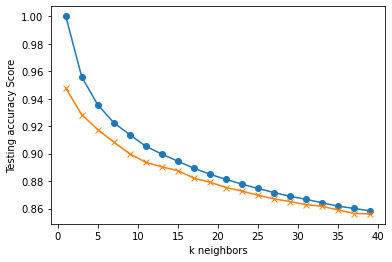

In [33]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot score results for training and test sets for each k=N    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [25]:
# Print test score for best k
# k: 5 appears to be best (scores plateau at 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Train Acc: %.3f' % knn.score(X_train, y_train))
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Train Acc: 0.981
k=5 Test Acc: 0.981


In [26]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions,
                            target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      7133
      Stroke       0.00      0.00      0.00       135

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



In [27]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = knn.predict(X)

print(classification_report(y, predictions,
                            target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99     28524
      Stroke       0.58      0.01      0.02       548

    accuracy                           0.98     29072
   macro avg       0.78      0.51      0.51     29072
weighted avg       0.97      0.98      0.97     29072



## Use cell below to make predictions with KNN model

### List of input values in order (with codification)
 - Gender (Female=0,Male=1,Other=2)
 - Age (actual value)
 - Hypertension (No=0,Yes=1)
 - Heart Diserase (No=0,Yes=1)
 - Married (No=0,Yes=1)
 - Work Type (Private=0,Self-employed=1,children=2,Govt_job=3,Never_worked=4")
 - Residence Type (Urban=0,Rural=1)
 - Blood Glucose Level (actual value)
 - BMI (actual value)
 - Smoking (never smoked=0,formerly smoked=1,smokes=2,unkown=3)

### Output prediction value
 - Have you had a Stroke? (No=0,Yes=1)

In [13]:
sample = [[1,27,0,0,0,0,0,100,29,1]]
prediction = knn.predict(sample)
print(prediction)

[0]


## Save Model to File

In [ ]:
import joblib

In [ ]:
filename = 'knn_model.sav'

#dump model to file
joblib.dump(knn, filename)

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(sample)
print(result)